<a href="https://colab.research.google.com/github/jacob-siby/creditcardfraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/SideProj/CreditCardFraud')

In [4]:
import pandas as pd

df = pd.read_csv('fraudTrain.csv')


df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#Preprocessing

In [5]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
type(df['trans_date_trans_time'])


pandas.core.series.Series

In [ ]:
df['trans_date']= pd.to_datetime(df['trans_date_trans_time']).dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time']).dt.time
df['trans_time'].head()

In [7]:
del df['trans_date_trans_time']
del df['Unnamed: 0']
del df['first']
del df['last']
del df['unix_time']
del df['trans_num']

In [8]:
df.shape

(1296675, 19)

In [9]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  object 
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   gender      1296675 non-null  object 
 5   street      1296675 non-null  object 
 6   city        1296675 non-null  object 
 7   state       1296675 non-null  object 
 8   zip         1296675 non-null  int64  
 9   lat         1296675 non-null  float64
 10  long        1296675 non-null  float64
 11  city_pop    1296675 non-null  int64  
 12  job         1296675 non-null  object 
 13  dob         1296675 non-null  object 
 14  merch_lat   1296675 non-null  float64
 15  merch_long  1296675 non-null  float64
 16  is_fraud    1296675 non-null  int64  
 17  trans_date  1296675 non-null  object 
 18  trans_time  1296675 no

In [11]:
#saving as csv
df.to_csv('processedFile.csv')

In [76]:

df["trans_date"] =  pd.to_datetime(df["trans_date"], format="%Y/%m/%d")


In [77]:

df["dob"] =  pd.to_datetime(df["dob"], format="%Y/%m/%d")


In [14]:

df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.hour

In [58]:

df['trans_date'] = df['trans_date'].dt.strftime('%Y-%m-%d')
df['dob'] = df['dob'].dt.strftime('%Y-%m-%d')



In [15]:
#label encoder category
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['category'].unique())
desg=df['category'].unique()
df['category']= label_encoder.fit_transform(df['category'])
desg_en=df['category'].unique()
print(df['category'].unique())

['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
[ 8  4  0  2  9  3 11 12  1 10  5 13  7  6]


In [16]:
#label encoder merchant
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['merchant'].unique())
desg=df['merchant'].unique()
df['merchant']= label_encoder.fit_transform(df['merchant'])
desg_en=df['merchant'].unique()
print(df['merchant'].unique())

['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud_Mosciski,

In [17]:
#label encoder gender
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['gender'].unique())
desg=df['gender'].unique()
df['gender']= label_encoder.fit_transform(df['gender'])
desg_en=df['gender'].unique()
print(df['gender'].unique())

['F' 'M']
[0 1]


In [18]:
#label encoder street
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['street'].unique())
desg=df['street'].unique()
df['street']= label_encoder.fit_transform(df['street'])
desg_en=df['street'].unique()
print(df['street'].unique())

['561 Perry Cove' '43039 Riley Greens Suite 393'
 '594 White Dale Suite 530' '9443 Cynthia Court Apt. 038'
 '408 Bradley Rest' '4655 David Island' '889 Sarah Station Suite 624'
 '231 Flores Pass Suite 720' '6888 Hicks Stream Suite 954'
 '21326 Taylor Squares Suite 708' '1831 Faith View Suite 653'
 '43576 Kristina Islands' '3337 Lisa Divide' '5916 Susan Bridge Apt. 939'
 '1632 Cohen Drive Suite 639' '870 Rocha Drive'
 '44259 Beth Station Suite 215' '4923 Campbell Pines Suite 717'
 '268 Hayes Rue Suite 811' '269 Sanchez Rapids' '4005 Dana Glens'
 '21447 Powell Circle' '2481 Mills Lock' '759 Erin Mount Suite 956'
 '7683 Natasha Way Apt. 945' '551 Zachary Freeway' '61390 Hayes Port'
 '7483 Navarro Flats' '2711 Duran Pines' '969 Huerta Path Apt. 270'
 '57887 Gutierrez Harbor' '39787 Pamela Fall Suite 639'
 '445 Jerry Lights Apt. 081' '50872 Alex Plain Suite 088'
 '20937 Reed Lakes Apt. 271' '61107 Edwards Dam Apt. 463'
 '9333 Valentine Point' '742 Oneill Shore' '41851 Victor Drives Suite 21

In [19]:
#label encoder city
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['city'].unique())
desg=df['city'].unique()
df['city']= label_encoder.fit_transform(df['city'])
desg_en=df['city'].unique()
print(df['city'].unique())

['Moravian Falls' 'Orient' 'Malad City' 'Boulder' 'Doe Hill' 'Dublin'
 'Holcomb' 'Edinburg' 'Manor' 'Clarksville' 'Clarinda'
 'Shenandoah Junction' 'Saint Petersburg' 'Grenada'
 'High Rolls Mountain Park' 'Harrington Park' 'Lahoma' 'Carlisle'
 'Harborcreek' 'Elizabeth' 'Methuen' 'Moulton' 'Plainfield' 'May'
 'Waukesha' 'Bailey' 'Romulus' 'Freedom' 'Honokaa' 'Valentine' 'Westfir'
 'Tiptonville' 'Republic' 'Baton Rouge' 'Washington' 'Big Creek'
 'Bellmore' 'Florence' 'Allentown' 'Moriches' 'Esbon' 'Chatham' 'Thompson'
 'North Prairie' 'Laredo' 'Grant' 'Conway' 'New Goshen' 'Sunflower'
 'Enola' 'Roosevelt' 'Pointe Aux Pins' 'Dallas' 'Jay' 'North Tonawanda'
 'Athena' 'Chester' 'Elkhart' 'Surrency' 'Arcadia' 'Gaithersburg'
 'Bowdoin' 'Heart Butte' 'San Jose' 'Rumely' 'Cranks' 'Ravenna' 'Utica'
 'Uledi' 'Naples' 'Thida' 'Parks' 'Central' 'Fort Washakie' 'Etlan'
 'Brinson' 'Shrewsbury' 'Bigelow' 'North Washington' 'Holloway'
 'Littleton' 'Hinesburg' 'Meadville' 'Elberta' 'Moab' 'Diamond' 'Bra

In [20]:
#label encoder state
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['state'].unique())
desg=df['state'].unique()
df['state']= label_encoder.fit_transform(df['state'])
desg_en=df['state'].unique()
print(df['state'].unique())

['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']
[27 47 13 26 45 38 16 42 12 49  9  4 32 31 36 15 19 43 48 22 50 11 29 37
 18  7 17 34 25 44  1  2 20 10 21  3 23 35  5 46 24 40 33 14 30 41  0 28
  6 39  8]


In [21]:
#label encoder job
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['job'].unique())
desg=df['job'].unique()
df['job']= label_encoder.fit_transform(df['job'])
desg_en=df['job'].unique()
print(df['job'].unique())

['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources offi

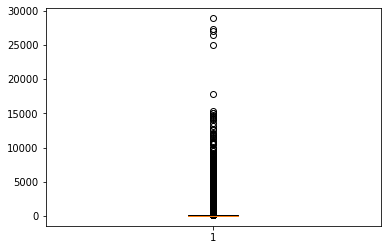

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
plt.boxplot(df["amt"])
plt.show()

In [59]:
print(df['amt'].skew())

42.277873790051174


In [60]:
df['amt'].std()

160.3160385715229

In [61]:
df['amt'].mean()

70.35103545606833

In [62]:
df['amt'].min()

1.0

In [63]:
df['amt'].max()

28948.9

In [64]:
Q3 = np.quantile(df['amt'], 0.75)
Q1 = np.quantile(df['amt'], 0.25)
print(Q1,Q3)

9.65 83.14


In [65]:
len(np.where(df['amt']<83.14)[0])

972492

In [29]:
len(np.where(df['is_fraud']==1)[0])

7506

under sampling

In [88]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['is_fraud'] == 1]
non_fraud_df = df.loc[df['is_fraud'] == 0][:7506]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,trans_time
1178559,4536996888716062123,572,4,293.71,1,772,252,32,87533,35.9866,-106.0654,18408,226,1972-07-18,35.655151,-106.276084,1,2020-05-07,0
356794,571314334723,309,4,363.09,0,463,490,38,15458,39.8882,-79.8694,2379,404,1971-01-19,40.511863,-80.141014,1,2019-06-16,0
496753,4797297220948468262,70,9,506.58,0,341,608,15,47451,38.8938,-86.5246,1228,113,1991-03-13,39.787399,-87.420145,0,2019-08-04,14
795706,4512828414983801773,640,12,4.31,0,859,816,38,15484,39.8936,-79.7856,328,481,1983-07-25,40.010763,-79.757451,0,2019-12-02,22
1040779,4195832462863385,183,2,18.96,0,68,149,24,63336,39.3465,-90.9362,1146,186,1929-04-07,39.047578,-91.655151,1,2020-03-08,0


In [31]:
new_df.shape

(15012, 19)

In [33]:
new_df.describe()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_time
count,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000
mean,4.063841e+17,342.405476,6.766320,300.339908,0.477351,493.932720,442.568878,26.682454,48358.700173,38.575799,-90.020521,9.071617e+04,250.945177,38.565715,-90.025332,0.500000,13.430789
std,1.290419e+18,197.562221,3.868364,378.564117,0.499503,281.821005,258.234424,14.275306,26974.223988,5.136378,13.943912,3.106376e+05,140.320612,5.168951,13.963234,0.500017,8.402184
min,6.041621e+10,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1257.000000,20.027100,-165.672300,2.300000e+01,0.000000,19.144328,-166.651656,0.000000,0.000000
25%,1.800385e+14,175.000000,4.000000,20.340000,0.000000,255.000000,222.000000,15.000000,25526.000000,34.847000,-96.708000,7.410000e+02,132.000000,34.903020,-96.717351,0.000000,4.000000
50%,3.524575e+15,346.000000,7.000000,93.040000,0.000000,492.000000,435.000000,28.000000,47434.000000,39.401500,-86.965700,2.457000e+03,252.000000,39.371628,-87.118585,0.500000,15.000000
75%,4.642255e+15,507.000000,11.000000,478.100000,1.000000,738.000000,669.000000,38.000000,70914.000000,41.940400,-80.128400,2.036550e+04,374.000000,41.966021,-80.172026,1.000000,22.000000
max,4.992346e+18,692.000000,13.000000,9455.150000,1.000000,982.000000,893.000000,50.000000,99783.000000,66.693300,-67.950300,2.906700e+06,493.000000,67.510267,-67.252957,1.000000,23.000000


In [36]:
Q3 = np.quantile(new_df['amt'], 0.75)
Q1 = np.quantile(new_df['amt'], 0.25)
print(Q1,Q3)

20.34 478.1


In [39]:
new_df['amt'].max()

9455.15

In [43]:
new_df['amt'].mean()

300.3399080735399

In [45]:
new_df.loc[new_df['amt']>750]

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,trans_time
558477,3531129874770000,27,11,935.20,0,963,90,46,5733,43.8065,-73.0882,5895,411,1975-07-13,44.360442,-73.066925,1,2019-08-26,2
869098,2291163933867244,149,8,776.64,1,360,168,40,29209,33.9659,-80.9355,333497,287,1968-03-19,34.588151,-81.781252,1,2019-12-19,22
827669,6011626928491360,656,12,1003.66,0,634,70,42,38315,35.2289,-88.6440,3876,419,1960-11-19,35.144109,-87.777995,1,2019-12-09,23
169902,4629451965224809,480,12,874.83,0,495,316,10,31632,30.9416,-83.3574,10295,453,1997-12-26,30.974556,-82.383180,1,2019-03-30,22
462690,676148621961,108,8,779.25,0,906,228,14,62023,39.1118,-89.7855,91,286,1962-11-18,39.072469,-90.087086,1,2019-07-22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287345,3527536963490470,144,12,885.70,0,285,107,40,29911,32.9413,-81.1807,1725,424,1974-12-05,32.340725,-80.718893,1,2020-06-17,11
538327,502012776709,426,8,844.60,0,136,284,34,13342,42.6315,-75.1866,165,308,1945-09-20,42.207966,-74.695138,1,2019-08-18,23
393032,4822367783500458,327,8,904.15,1,960,317,9,33844,28.0758,-81.5929,33804,186,1991-01-01,28.159294,-82.115080,1,2019-06-29,3
65996,180049032966888,560,8,836.07,1,705,731,48,54559,46.4959,-90.4383,795,460,1986-04-15,46.489842,-89.963278,1,2019-02-08,22


#Modeling

In [89]:
new_df['dob_year'] = pd.DatetimeIndex(new_df['dob']).year
new_df['dob_month'] = pd.DatetimeIndex(new_df['dob']).month
new_df['dob_day'] = pd.DatetimeIndex(new_df['dob']).day

In [90]:
new_df['trans_year'] = pd.DatetimeIndex(new_df['trans_date']).year
new_df['trans_month'] = pd.DatetimeIndex(new_df['trans_date']).month
new_df['trans_day'] = pd.DatetimeIndex(new_df['trans_date']).day

In [ ]:
del new_df['dob']

In [93]:

del new_df['trans_date']

In [94]:
#splitting
from sklearn.model_selection import train_test_split

X = new_df.drop(["is_fraud"],axis=1)
y = new_df["is_fraud"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, shuffle = True)

#y_train = y_train.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (12009, 22)
x_test shape: (3003, 22)
y_train shape: (12009,)
y_test shape: (3003,)


In [95]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 1178559 to 183134
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cc_num       15012 non-null  int64  
 1   merchant     15012 non-null  int64  
 2   category     15012 non-null  int64  
 3   amt          15012 non-null  float64
 4   gender       15012 non-null  int64  
 5   street       15012 non-null  int64  
 6   city         15012 non-null  int64  
 7   state        15012 non-null  int64  
 8   zip          15012 non-null  int64  
 9   lat          15012 non-null  float64
 10  long         15012 non-null  float64
 11  city_pop     15012 non-null  int64  
 12  job          15012 non-null  int64  
 13  merch_lat    15012 non-null  float64
 14  merch_long   15012 non-null  float64
 15  is_fraud     15012 non-null  int64  
 16  trans_time   15012 non-null  int64  
 17  dob_year     15012 non-null  int64  
 18  dob_month    15012 non-null  int64  
 1

In [96]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
#accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

#print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

k_clf=knn.predict(x_test)

Test Score: 0.6346986346986347
